In [106]:
import matplotlib
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 
import fit_library as fit
%matplotlib nbagg
%load_ext autoreload
%autoreload 2
import time
import tables
import pandas as pd


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
a=pd.read_csv("/mnt/WINDOWS_ntfs/DATOS_DAC/nominal_ch18_evt2.txt", 
              names=[0], header=None, dtype='int32')
f=np.array(np.zeros(len(a)))
f=a.values[:,0]

## Noise is in the lower band. LPF to limit aliasing and clean the signal.

<IPython.core.display.Javascript object>


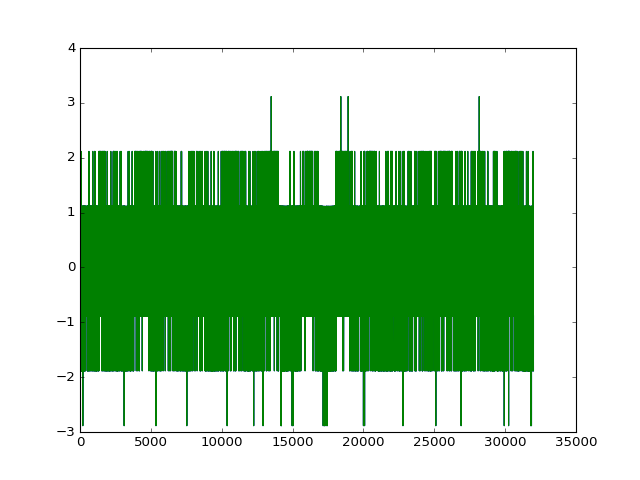

In [108]:
# Note: Use 20 MHz Bandwidth for non filtering effect

signal_in=f-np.mean(f)
f_sample = 40E6
freq_LPF = 20E6*2*np.pi
freq_LPFd = freq_LPF / (f_sample*np.pi)
b, a = signal.butter(1, freq_LPFd, 'low', analog=False)
signal_out = signal.lfilter(b,a,signal_in)


plt.figure(1)
plt.plot(signal_in)
plt.plot(signal_out)
plt.show()

In [99]:
sp = np.fft.fft(signal_out)
freq=np.fft.fftfreq(len(f), d=25E-9)

## FFT after filtering

<IPython.core.display.Javascript object>


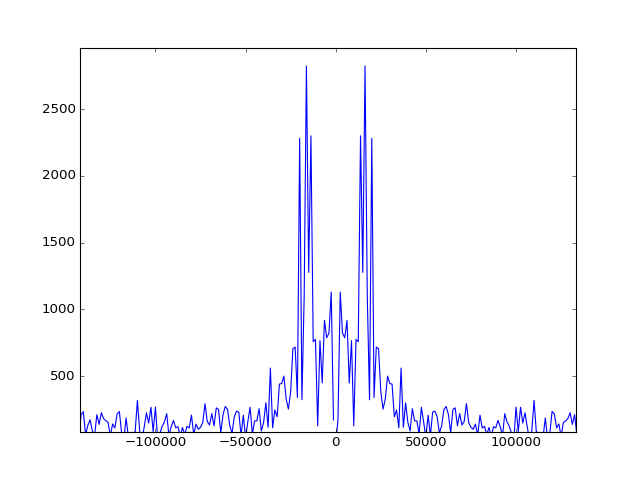

In [109]:
plt.figure(2)
plt.plot(freq, np.absolute(sp))
plt.show()

## Define frequency limits of the Senoidal noise


In [91]:
selec=(freq>10000)*(freq<25000)
whole_noise=np.sum(np.absolute(sp[0:len(sp)/2])); 
coupled_noise = np.sum(selec*np.absolute(sp));
print ("COUPLED NOISE WEIGHT (%)=", coupled_noise/whole_noise*100)

('TOTAL_noise=', 1971962.8461029986)
('Coupled_noise=', 13410.073440754555)
('COUPLED NOISE WEIGHT (%)=', 0.68003682053420023)
